In [1]:
%load_ext autoreload
%autoreload 2
import gym
import torch
from torch import nn
import dqn
import pprint
from matplotlib import pyplot as plt
import constants
import numpy as np

/Users/witran/code/labs/rl-algos/venv/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


{'action_size': None,
 'adam_beta_m': 0.9,
 'adam_beta_v': 0.999,
 'adam_epsilon': 1e-08,
 'adam_lr': 0.001,
 'batch_size': 8,
 'bootstrap_type': 'expected',
 'demo': True,
 'demo_interval': 10,
 'discount': 0.99,
 'encode_time': False,
 'epochs': 1,
 'greedy_epsilon_decay': 0.1,
 'greedy_epsilon_max': 1.0,
 'greedy_epsilon_min': 0.0001,
 'log': True,
 'log_interval': 1000,
 'loss': 'mse',
 'n_batches': 4,
 'n_episodes': 300,
 'n_steps': 500000,
 'n_steps_to_start_training': 200,
 'optimizer': 'adam',
 'priority_alpha': 0,
 'priority_epsilon': 0,
 'rmsprop_lr': 0.001,
 'softmax_temperature': 0.001,
 'state_size': None,
 'store_size': 50000,
 'target_update_interval': 1,
 'timeout': 1000,
 'timeout_reward': 0,
 'use_double_q': False}
input:8, output:4
-----
step #1000, num episodes played: 4, store size: 1000 loss: 1.7577, last 4 episodes avg=-288.6091 best=-158.6904 worst=-473.8385
-----
step #2000, num episodes played: 5, store size: 2000 loss: 8.8341, last 5 episodes avg=-268.0546 be

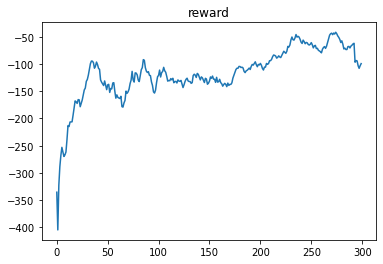

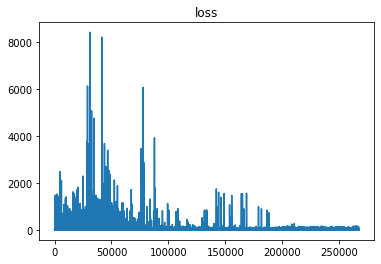

file-id 2020_06_12_23_42


In [2]:
env = gym.make('LunarLander-v2')
# env = gym.make('CartPole-v0')
# env = gym.make('MountainCar-v0')

agent = dqn.Agent(
    discount=0.99,
    softmax_temperature=0.001,

    greedy_epsilon_max=0.1,
    greedy_epsilon_decay=0.1,
    greedy_epsilon_min=1e-4,
    
    bootstrap_type = constants.BOOTSTRAP_EXPECTED_Q,
    use_double_q = False,
    
    # store config
    priority_epsilon=0,
    priority_alpha=0,
    store_size=50000,
    
    # main loop
    n_steps=500000,
    n_episodes=300,
    target_update_interval=1,
    n_steps_to_start_training=200,
    
    # logging config
    log=True,
    log_interval=1000,
    demo=True,
    demo_interval=10,
    
    # env config
    timeout=1000,
    timeout_reward=-500,
    
    # model connfig
    encode_time=False,
    loss=constants.LOSS_MSE,
    optimizer=constants.OPTIMIZER_ADAM,
    rmsprop_lr=1e-3,
    adam_lr=1e-3,
    adam_beta_m=0.9,
    adam_beta_v=0.999,
    adam_epsilon=1e-8,
    n_batches=4,
    batch_size=8,
    epochs=1,
)

agent.use_double_q = False
agent.encode_time = True
qnet, reward_histories, loss_histories = dqn.run(env, agent, n_runs=1, show_plot=True)

# print(np.average(reward_histories, axis=0))
# # plot("loss", np.average(loss_histories, axis=0))
# plot("reward", reward_histories)
# plot("reward mean", np.average(reward_histories, axis=0))
# plot("loss mean", np.average(loss_histories, axis=0))
# plot("reward mean", np.average(reward_histories, axis=0))


In [20]:
result = dqn.play(env, agent, qnet, render=True)
print(result)


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
-200.0


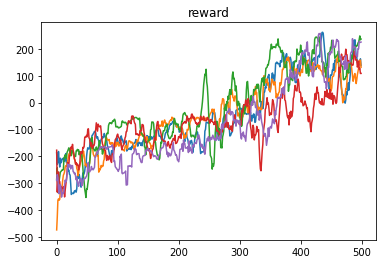

In [40]:
qnet = nn.Sequential(
        nn.Linear(9, 256),
        nn.ReLU(),
        nn.Linear(256, 4)
    )
qnet.load_state_dict(torch.load('./models/LunarLander-v2-' + now))
qnet.eval()

load('data/reward_histories_' + now + '.npy')
plot('reward', reward_histories)


In [30]:
agent = dqn.Agent(
    discount=0.99,
    softmax_temperature=0.001,

    greedy_epsilon_max=1.0,
    greedy_epsilon_decay=0.1,
    greedy_epsilon_min=1e-4,
    priority_epsilon=0,
    priority_alpha=0,

    store_size=50000,
    n_steps=300000,
    n_episodes=300,

    target_update_interval=1,
    n_steps_to_start_training=200,

    log_interval=1000,
    demo_interval=30,

    timeout=1000,
    timeout_reward=-1000,

    optim_lr=0.001,
    optim_beta_m=0.9,
    optim_beta_v=0.999,
    optim_epsilon=1e-8,
    
    n_batches=4,
    batch_size=8,
    epochs=1, # descend iterations each batch
)
env = gym.make('LunarLander-v2')
dqn.play(env, agent, qnet, render=True)

[1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 3, 0, 2, 0, 0, 2, 2, 0, 0, 2, 3, 0, 2, 0, 2, 2, 0, 3, 2, 3, 2, 3, 2, 0, 0, 2, 0, 3, 3, 3, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 3, 3, 1, 2, 3, 2, 2, 2, 1, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


279.157194570524